# <span style="color:#F72585"><center>La Estrategia Bayesiana</center></span>


## <span style="color:#4361EE">Introducción</span>

Veremos los componentes básicos de un modelo Bayesiano. En esta lección nos basamos en  la tarea propuesta en la lección anterior. Recordemos la narrativa de los datos:
Hemos usado un globo terráqueo a escala.


<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Estadistica-Bayesiana/main/Introduccion/Imagenes/GlobeSK.jpg" width="500" height="400" align="center" /> 
</center>   
</figure>

Fuente: [wikipedia](https://es.wikipedia.org/wiki/Globo_terr%C3%A1queo#/media/Archivo:GlobeSK.jpg)



1. El experimento consiste en hacer girar el globo y *pinchar* en algún lugar sin tener ninguna preferencia. El experimento es de tipo dicotómico, debido a que solamente habrá dos posibles resultados: agua (1) o tierra (0).

- La probabilidad de *pinchar* en agua corresponde al valor verdadero de la proporción de agua y se denotará $\mu$.
- La probabilidad de *pinchar* en tierra corresponde al valor verdadero de la proporción de tierra y es $ 1-\mu$.
- Cada experimento es independiente de los demás.

## <span style="color:#4361EE">Componentes del Modelo Bayesiano</span>


### <span style="color:#4CC9F0">Verosimilitud</span>


El primer componente y el más influyente de un modelo Bayesiano es la verosimilitud.
La verosimilitud es una fórmula matemática que especifica la plausibilidad de los datos.

Lo que esto significa es que la verosimilitud mapea cada conjetura. 

Puede crear su propia fórmula de verosimilitud a partir de los supuestos básicos de su historia de cómo surgen los datos. Eso es lo que hicimos en el ejemplo anterior. O puede usar una de las muchas posibilidades que son comunes en las ciencias



#### <span style="color:#4CC9F0">Ejemplo 1: Experimento Binomial</span>



Por la forma como hemos descrito la forma de obtención de los datos y si se ha supuesto que el globo se pincharía exactamente $n$ veces, entonces la probabilidad de obtener $w$ veces agua esta dada por 

$$P(w| \mu, N) =  \frac{n!}{(n-w)!w!} \mu^w(1-\mu)^{n-w} = Binomial(w;n,\mu)$$

Esta expresión se puede leer así: El conteo del número de observaciones $w$ se distribuye binomialmente, con probabilidad $\mu$ de obtener agua en cada pinchazo, y se hacen en total $n$ pinchazos.

Por ejemplo, si $\mu= 0.5$, la probabilidad de obtener 6 veces agua en $n=9$ pinchazos es exactamente
0.1640625, como podemos verificar con el siguiente código Python:


In [2]:
from scipy import stats

stats.binom(n=9,p=0.5).pmf(k=6)

0.16406250000000003

#### <span style="color:#4CC9F0">El papel de la verosimilitud en Estadística</span>


Notablemente, los supuestos más influyentes tanto en los modelos Bayesianos como en los no Bayesianos son las funciones de verosimilitud y sus relaciones con los parámetros.

Los supuestos sobre la verosimilitud influyen en la inferencia para cada pieza de datos. En la medida que el tamaño de la muestra aumenta, la verosimilitud es cada vez más importante. Esto ayuda a explicar por qué las inferencias Bayesianas y las no Bayesianas son a menudo muy similares.


### <span style="color:#4CC9F0">Los parámetros</span>


Supongamos que $W$ es la variable aleatoria que cuenta el número de veces que se obtiene agua en los $n$ pinchazos. 

En general las funciones de verosimilitud tienen entradas que pueden ajustarse según el problema. En la verosimilitud binomial del ejemplo, estas entradas son $\mu$ (la probabilidad de observar $W=w$), $n$ (el tamaño de la muestra) y $w$ (el número de $W$'s).

Algunas de estas cantidades son las que deseamos estimar a partir de los datos. Estas cantidades se llamarán **parámetros**. Desde el punto de vista Bayesiano los parámetros y los datos son generados por variables aleatorias.

$\leadsto$ Los parámetros representan *conjeturas o explicaciones* de los datos. 


En nuestro ejemplo, $n$ y $w$ son conocidas después de realizar el experimento. Se suponemos que *hemos observado  sin error*,  llegamos a que $\mu$ es un parámetro desconocido que deseamos estimar.

El propósito de nuestra máquina Bayesiana es **describir** lo que nos dicen los datos acerca de $\mu$.

#### <span style="color:#4CC9F0">Sobre la naturaleza de los parámetros</span>



Aunque no es usual en la literatura (en realidad no lo hemos visto antes), vamos a llamar parámetro a la variable aleatoria (o distribución) que genera el parámetro numérico. Ronald Fisher, considerado el padre de la estadística clásica o frecuentista, siempre estuvo en contra del pensamiento Bayesiano. Esto causó que la estadística Bayesiana se mantuviera en el congelador científico por mucho tiempo. Para Fisher, los parámetros no pueden ser variables aleatorias sin cantidades que están ahí y que es necesario estimar. 

En concepto de los autores de este curso, en realidad es necesario diferenciar el parámetro numérico de la variable aleatoria que lo genera. Esto siempre ha sido confuso en la mayoría de los textos, los cuales utilizan de manera confusa el parámetro y el parámetro numérico. En realidad, podemos estar de acuerdo con Fisher en que el parámetro numérico es una cantidad que está ahi. Simplemente, la teoría Bayesiana indica una de manera científica cómo es que el parámetro llegó ahi. Como la realización de una variable aleatoria. 

Este origen del parámetro permite axiomatizar la teoría, es decir, permite construir axiomas a partir  de los cuales es posible construir la teoría estadística moderna. Algo que no es posible con la estadística clásica o frecuentista. Estos axiomas basados en la teorpiía de la decisión fueron introducidos por Savage en 1954. Para un introducción simple revise [este documento.](https://www.academia.edu/34860240/Teor%C3%ADa_de_la_Decisi%C3%B3n_y_Estad%C3%ADstica_Bayesiana)




### <span style="color:#4CC9F0">Distribución a priori</span>


Para cada parámetro que se desee que calcular, es necesario entregarle a la máquina Bayesiana una distribución a priori que proporciona una *plausibilidad inicial* a cada posible valor del parámetro.  **La a priori  es un conjunto inicial de plausibilidades, para todos los posibles valores del parámetro**.

$\leadsto$ Cuando se tiene una estimación previa del  parámetro, esta estimación se puede convertir en la a priori para los siguientes pasos de la máquina Bayesiana.

En la figura 3 se observa  cómo la máquina Bayesiana aprendió una pieza de datos a la vez. Como resultado, cada estimación se convierte en la a priori para el siguiente paso. 

Este proceso ilustrado en la figura 3, no resuelve el problema de proveerle a la máquina Bayesiana una a priori inicial.

#### <span style="color:#4CC9F0">¿De dónde provienen las distribuciones a priori?</span>


Desde el punto de vista de la ingeniería, las a priori constituyen un estado inicial requerido para que la máquina Bayesiana pueda empezar a aprender. En la figura 3, se entregó a la máquina una a priori plana.

$\leadsto$ En este caso, la distribución uniforme $\mathcal{U}(0,1)$, es una distribución que considera que cada valor es igualmente plausible. 

Las a priori planas son comunes en la práctica. Sin embargo, en general no son la mejor elección, debido a que no aportan ninguna información concreta del parámetro, con la posible excepción de indicar el rango admisible del parámetro. 

Algunas distribuciones a priori *empujan suavemente* a la máquina Bayesiana. Tales a priori son comúnmente llamadas **regularizadoras** o **débilmente informativas**. El uso de este tipo de  a prioris es tan útil que en procedimientos no Bayesianos (de inferencia clásica), se utilizan de forma equivalente (**verosimilitud penalizada**).

De manera más general distribuciones a priori se utilizan restringir los valores plausibles de los parámetros a rangos de valores razonables, o para expresar conocimientos a priori de los parámetros, antes que los datos sean observados.

#### <span style="color:#4CC9F0">Distribuciones a priori razonables para el experimento de esta lección.</span>




Una distribución que resulta muy apropiada para usarse como a priori para la máquina Bayesiana del experimento de esta lección es la distribución Beta, debido a que el rango de valores plausibles (dominio o soporte) de esta distribución es el intervalo $[0,1]$. La función de densidad de probabilidad (fdp) de la distribución Beta con parámetros $\alpha$ y $\beta$ es dada por

$$ Beta(x;\alpha,\beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{Beta(\alpha,\beta)},$$

con $x \in [0,1]$, $\alpha>0$, $\beta>0$ y $Beta(\alpha,\beta)= \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ , en donde $\Gamma$ es la función Gama. La distribución uniforme $\mathcal{U}(0,1)$ es el caso particular, en donde $\alpha=\beta=1$. Note que en este caso la fdp es dada por $\mathcal{U}(x;1,0) =1; x \in [0,1]$.

La siguiente figura muestra el gráfico de la función de densidad de probabilidad  (fdp) de la distribución Beta para diferente valores de los parámetros. 

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Estadistica-Bayesiana/main/Introduccion/Imagenes/Beta_distribution_pdf.png" width="600" height="400" align="center" /> 
</center>   
</figure>


Fuente: [Wikipedia, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=74166)

#### <span style="color:#4CC9F0">Sobre la arbitrariedad de las distribuciones a priori</span>


La presencia de la distribución a priori en los modelos estadísticos es comunmente criticada por algunas personas. 

$\leadsto$ *Algunos afirman que la escogencia de la a priori puede ser tan arbitraria que puede ser utilizada para mentir usando estadística*.

Ciertamente, la escogencia es muy flexible. Esto que da al usuario la posibilidad de entregar a la máquina Bayesiana, muy diversas formas de información inicial. Usarla para mentir con estadística es por otro lado bastante ingenuo. Evidenciar que se  está manipulando a la máquina para que entregue **resultados manipulados** es realmente muy simple y obvio. Existen formas muy oscuras y sofisticadas para mentir usando estadística.  No es precisamente manipulando la a priori un camino para hacer eso.



$\leadsto$ *Por otro lado, la escogencia de la verosimilitud si bien es más convencional que la escogencia de la a priori, también es subjetiva*. 

Muchos modelos estadísticos fracasan en describir el mundo grande básicamente por la escogencia de la verosimilitud y no por la a priori. La verosimilitud penalizada es recibida con entusiasmo, porque *evita la escogencia de una a priori*. En realidad, puede mostrarse que en la mayoría de casos, se está haciendo uso de distribuciones a priori y los estimadores penalizados son típicamente Bayesianos. 


### <span style="color:#4CC9F0">Distribución Posterior</span>


Luego de escogida la verosimilitud, los parámetros a se estimados y la distribución a priori asociada a cada parámetro, el modelo Bayesiano es una consecuencia lógica de estas hipótesis y su construcción se basa en el *teorema de Bayes*.

Como se ha convenido, en la Estadística Bayesiana se asume que los datos y los parámetros son generados aleatoriamente, con la restricción de que **los parámetros no son observados**. Solamente los datos. 

Supongamos que $p(w,\mu)$ representa distribución conjunta de $w$, y $\mu$. De acuerdo con la reglas multiplicativa de la suma de la probabilidad se tiene que

$$p(w,\mu) = p(w|\mu)p(\mu),$$
y
$$p(w,\mu) = p(\mu|w)p(w).$$

Por otro lado, las distribuciones marginales de $\mu$ y $w$, se obtienen a partir de la regla de la suma como

$$p(\mu) = \sum_{w} p(\mu|w)p(w)$$
y,

$$p(w) = \int_{w} p(w|\mu)p(\mu)d\mu.$$

$P(w)$ a veces llamada la *evidencia* o la *probabilidad de los datos*. En realidad es la **verosimilitud promedio  de los datos con respecto a ala distribución a priori**.


Por el teorema de Bayes se tiene que

$$p(\mu|w) = \frac{p(w|\mu)p(\mu)}{\int_{w} p(w|\mu)p(\mu)d\mu} \propto p(w|\mu)p(\mu)$$



Admonition
:::{admonition} 
:class: tip
Observe que $\int_{w} p(w|\mu)p(\mu)d\mu$ no depende de $\mu$. Por lo tanto es una constante de normalización para la distribución condicional $p(\mu|w)$.
:::


La distribución definida por la fdp $p(\mu|w)$ se llama **distribución posterior**. Esta forma de construir la distribución posterior es lo que originó el nombre de **Estadística Bayesiana**. 

$\leadsto$ *La distribución posterior combina la información a priori del parámetro, con la verosimilitud de los datos observados, dado el parámetro (no observado)*.

Entonces, La distribución posterior contiene la información de la distribución de los valores plausibles del parámetro, teniendo en cuenta la información o creencia a priori y los datos observados. 

El trabajo de la máquina Bayesiana es determinar a partir de la posterior, cual o cuáles son los valores más probables del parámetro.

### <span style="color:#4CC9F0">Distribución posterior en el ejemplo de esta lección</span>


Si suponemos que la distribución a priori para nuestro problemas es $Beta(\alpha,\beta)$, la posterior es dada por

$$p(\mu|w) \propto \mu^w(1-\mu)^{n-w}  \times \mu^{\alpha-1} (1-\mu)^{\beta-1} =  \mu^{w  + \alpha-1} (1-\mu)^{n-w\beta-1},$$

es decir que en este caso $p(\mu|w)= Beta(\mu;w  + \alpha, n-w+\beta)$.

Los gráficos de la figura 3 fueron producidos usando esta distribución. En la próxima lección haremos todos los cálculos y gráficos haciendo uso de Python.

El siguiente código R, ilustra las distribuciones a priori, verosimilitud y posterior en un ejemplo normal con una observación. 

````{tab} R
```R
# x es un vector de valores
plot.norm.density<-function(x, mean, sigma,lty){
 lines(x, dnorm(x,mean,sigma), type="l",lty=lty)
}

 # Parámetros previos (hiperparámetros)
  mu <- 2
  tau <- 1

 # Sigma conocida
  sigma <- 1
  theta <- 3

  # Observación
  x <- 6
 # Parámetros posteriores
 mean.p <- (sigma^2*mu + tau^2*x)/(sigma^2 + tau^2)
 var.p <-   (sigma^2 * tau^2 ) / (sigma^2 + tau^2 )

 # Variable auxiliar para el gráfico
 y<- seq(-2,10, length.out=100)
 # Hacer un gráfico en blanco
 
 plot(y, ylim=c(0,0.6), xlim=c(-2,10), type="n", xlab=expression(theta), ylab=("density"))
 legend(-2,0.5, legend=c("prior", "likelihood", "posterior"), lty=1:3,ncol=1)

 # Previa
 plot.norm.density(y,mu,tau,lty=1)   #N(2,1)
 # Verosimilitud
 plot.norm.density(y,x,sigma,lty=2)    # N(6,1)
 # Posterior
 plot.norm.density(y,mean.p,sqrt(var.p),lty=3)  # N(4,0.5)

```
````


#### <span style="color:#4CC9F0">Ejercicio</span>


1. Reflexione sobre el código y por supuesto el gráfico obtenido
2. Transforme el código a Python.


Despliegue las siguientes celdas para ver una posible solución para el segundo ejercicio

In [5]:
# Importar los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



Text(0.5, 0, '$\\theta$')

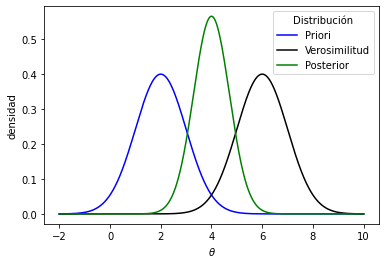

In [18]:
# Parametros a priori
mu = 2
tau = 1

# Sigma conocido
sigma = 1
theta = 3

# Observación
x = 6

# Parámetros posteriores
mean = (sigma**2*mu + tau**2*x)/(sigma**2 + tau**2)
var = (sigma**2 * tau**2 ) / (sigma**2 + tau**2 )

#Definir parámetros apra el eje x
y = np.arange(-2, 10 , 0.001)

#Definir y graficar las distintas
# Priori
plt.plot(y, norm.pdf(y, mu, tau), label='Priori',color= 'blue') #N(2,1)
# Verosimilitud
plt.plot(y, norm.pdf(y, x, sigma), label='Verosimilitud',color='black') # N(6,1)
# Posterior
plt.plot(y, norm.pdf(y, mean, np.sqrt(var)), label='Posterior',color='green') # N(4,0.5)
# Etiquetar ejes
plt.legend(title='Distribución')
plt.ylabel('densidad')
plt.xlabel('$\\theta$')

## <span style="color:#4361EE">Tarea</span>


Use geomaps o una simulación  y realice una estimación mas precisa para el problema de esta lección.